In [91]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.ticker as ticker
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
import math
from enum import Enum
import os
# from plotly.express import line
#import data
#import plotly.express as px
# %matplotlib inline 
sns.set(style="ticks")
plt.style.use('ggplot')
pd.set_option('display.max_columns',24)
pd.set_option('display.max_colwidth',None)
pd.set_option('display.float_format', lambda x: '%.4f' % x)

In [92]:
encoding = 'windows-1250'
data=pd.read_csv(r'C:\Users\Dima\Desktop\Homework\3 курс\ТМО\ЛР6\melb_data.csv', encoding = encoding)
data.shape
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

In [93]:
data.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.0000,13580.0000,13580.0000,13580.0000,13580.0000,13580.0000,13518.0000,13580.0000,7130.0000,8205.0000,13580.0000,13580.0000,13580.0000
mean,2.9380,1075684.0795,10.1378,3105.3019,2.9147,1.5342,1.6101,558.4161,151.9676,1964.6842,-37.8092,144.9952,7454.4174
std,0.9557,639310.7243,5.8687,90.6770,0.9659,0.6917,0.9626,3990.6692,541.0145,37.2738,0.0793,0.1039,4378.5818
min,1.0000,85000.0000,0.0000,3000.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1196.0000,-38.1825,144.4318,249.0000
25%,2.0000,650000.0000,6.1000,3044.0000,2.0000,1.0000,1.0000,177.0000,93.0000,1940.0000,-37.8568,144.9296,4380.0000
50%,3.0000,903000.0000,9.2000,3084.0000,3.0000,1.0000,2.0000,440.0000,126.0000,1970.0000,-37.8024,145.0001,6555.0000
75%,3.0000,1330000.0000,13.0000,3148.0000,3.0000,2.0000,2.0000,651.0000,174.0000,1999.0000,-37.7564,145.0583,10331.0000
max,10.0000,9000000.0000,48.1000,3977.0000,20.0000,8.0000,10.0000,433014.0000,44515.0000,2018.0000,-37.4085,145.5264,21650.0000


In [94]:
data.dtypes

Suburb            object
Address           object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Date              object
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount    float64
dtype: object

In [95]:
type_mapping = {
    "h": "house",
    "u": "unit",
    "t": "townhouse"
}

# Map the values in the "Type" column
data["Type"] = data["Type"].map(type_mapping)

In [96]:
method = { "S": "sold",
          "SP" : "sold prior",
          "PI" : "passed in",
          "VB" : "vendor bid"}
data['Method'] = data['Method'].map(method)

In [97]:
null_columns = data.columns[data.isnull().any()]
data.isnull().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method             92
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

In [98]:
null_columns

Index(['Method', 'Car', 'BuildingArea', 'YearBuilt', 'CouncilArea'], dtype='object')

Text(0.5, 1.0, 'Пропуски')

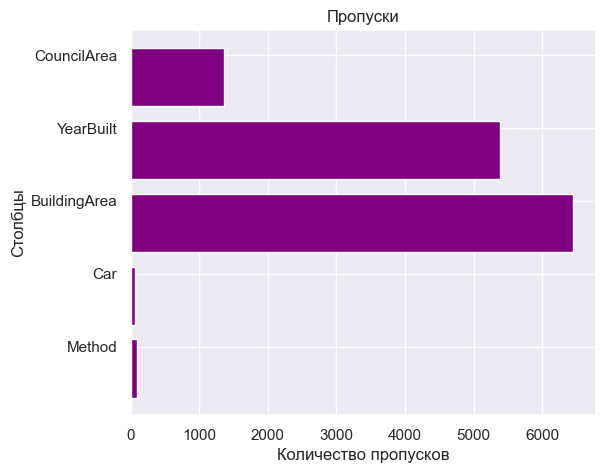

In [99]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1)

# pd.options.display.mpl_style = 'default'
labels = []
values = []
for col in null_columns:
    labels.append(col)
    values.append(data[col].isnull().sum())
ind = np.arange(len(labels))
width=0.6
fig, ax = plt.subplots(figsize=(6,5))
rects = ax.barh(ind, np.array(values), color='purple')
ax.set_yticks(ind+((width)/2.))
ax.set_yticklabels(labels, rotation='horizontal')
ax.set_xlabel("Количество пропусков")
ax.set_ylabel("Столбцы")
ax.set_title("Пропуски")

In [100]:
# Удаление строк с пропущенными значениями в столбцах "Method" и "Car"
data.dropna(subset=["Method", "Car"], inplace=True)


In [101]:
# Заполнение пропущенных значений в столбцах "BuildingArea", "YearBuilt" и "CouncilArea"
# Для числовых столбцов можно использовать медиану
median_BuildingArea = data["BuildingArea"].median()
median_YearBuilt = data["YearBuilt"].median()
# Для категориального столбца можно использовать наиболее часто встречающееся значение
mode_CouncilArea = data["CouncilArea"].mode()[0]

data["BuildingArea"].fillna(median_BuildingArea, inplace=True)
data["YearBuilt"].fillna(median_YearBuilt, inplace=True)
data["CouncilArea"].fillna(mode_CouncilArea, inplace=True)


In [102]:
data.shape

(13427, 21)

In [103]:
categorical_columns = [ cname for cname in data.columns if
                      data[cname].nunique() < 20 and
                      data[cname].dtypes in ['object','int64','float64']]
categorical_columns

['Rooms', 'Type', 'Method', 'Bedroom2', 'Bathroom', 'Car', 'Regionname']

In [104]:
for name in categorical_columns:
    print(name)
    print(data[name].value_counts())

Rooms
Rooms
3     5809
2     3602
4     2665
1      674
5      591
6       67
7       10
8        8
10       1
Name: count, dtype: int64
Type
Type
house        9324
unit         2996
townhouse    1107
Name: count, dtype: int64
Method
Method
sold          8988
sold prior    1695
passed in     1557
vendor bid    1187
Name: count, dtype: int64
Bedroom2
Bedroom2
3.0000     5823
2.0000     3691
4.0000     2580
1.0000      684
5.0000      550
6.0000       63
0.0000       16
7.0000       10
8.0000        5
9.0000        3
20.0000       1
10.0000       1
Name: count, dtype: int64
Bathroom
Bathroom
1.0000    7419
2.0000    4921
3.0000     912
4.0000     104
0.0000      34
5.0000      28
6.0000       5
7.0000       2
8.0000       2
Name: count, dtype: int64
Car
Car
2.0000     5538
1.0000     5480
0.0000     1024
3.0000      744
4.0000      504
5.0000       63
6.0000       53
8.0000        9
7.0000        8
10.0000       3
9.0000        1
Name: count, dtype: int64
Regionname
Regionname
Southern M

In [105]:
data = data.drop(columns='Suburb')
data = data.drop(columns='Address')
data = data.drop(columns='Type')
data = data.drop(columns='Method')
data = data.drop(columns='SellerG')
data = data.drop(columns='Date')
data = data.drop(columns='CouncilArea')
data = data.drop(columns='Regionname')

In [106]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor

# Подготовка данных
# Заполнение пропущенных значений, кодирование категориальных признаков и т.д.

# Выделение признаков и целевой переменной
X = data.drop(columns=['Price'])  # Признаки
y = data['Price']  # Целевая переменная

# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Масштабирование признаков
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Обучение многослойного персептрона
mlp = MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', max_iter=500)
mlp.fit(X_train_scaled, y_train)

# Оценка модели
train_score = mlp.score(X_train_scaled, y_train)
test_score = mlp.score(X_test_scaled, y_test)
print(f'Train R^2 Score: {train_score}')
print(f'Test R^2 Score: {test_score}')


Train R^2 Score: 0.583122357409775
Test R^2 Score: 0.5289645894868265


C:\Users\Dima\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
